In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

In [2]:
from google.colab import files
import pandas as pd

# Upload the file from your local machine to Colab
uploaded = files.upload()

# Assuming the uploaded file is named 'hypothyroid.csv'
file_path = 'hypothyroid.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

Saving hypothyroid.csv to hypothyroid.csv


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [5]:
df=df.replace({"t":1,"f":0})

In [6]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [7]:
del df["TBG"]

In [8]:
df=df.replace({"?":np.NAN})

In [10]:
df.isnull().sum() #count and sum the number of nulls in each column

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [11]:
df=df.replace({"F":1,"M":0})

In [12]:
del df["referral source"]

In [13]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [14]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') #coerce is a error handling library to handle non convertible objects to convert as NaN
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [17]:
df.isnull().sum() #missing field -> 'NaN'

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [ ]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True) # inplace-true makes sure no extra copy gets created

In [18]:
df['sex'].fillna(df['sex'].mean(), inplace=True) #works only for binary values or a few discrete values

In [19]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #works for decimal values and calculated mean

In [21]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [22]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [23]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [24]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [25]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [26]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [ ]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,0


In [27]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [34]:
import seaborn as sns # used for plotting different values of dataframe

%matplotlib inline
sns.set(rc={'figure.figsize': [4, 4]}, font_scale=1.2)

<ipython-input-35-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

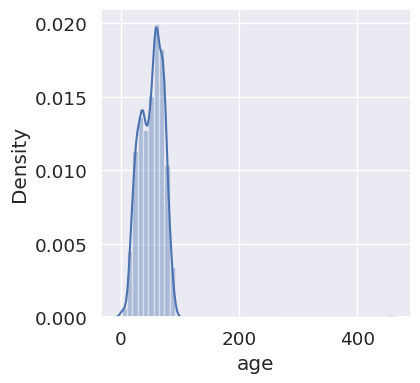

In [35]:
sns.distplot(df['age'])

<ipython-input-36-6434e6ccc7f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'])


<Axes: xlabel='sex', ylabel='Density'>

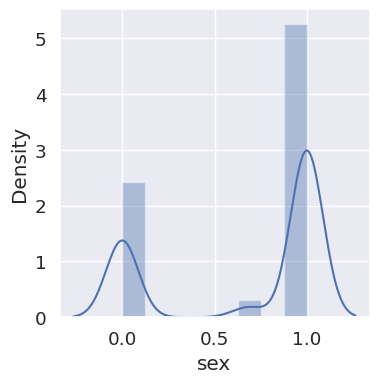

In [36]:
sns.distplot(df['sex'])

<ipython-input-38-9a4ccb1c10c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T3'])


<Axes: xlabel='T3', ylabel='Density'>

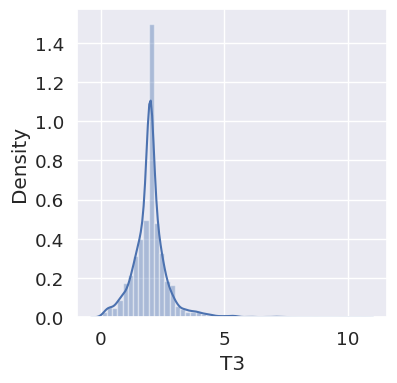

In [38]:
sns.distplot(df['T3'])

<ipython-input-39-c3341520245c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TT4'])


<Axes: xlabel='TT4', ylabel='Density'>

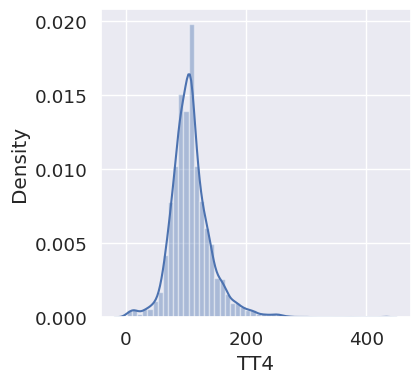

In [39]:
sns.distplot(df['TT4'])

<ipython-input-40-87b814d510ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T4U'])


<Axes: xlabel='T4U', ylabel='Density'>

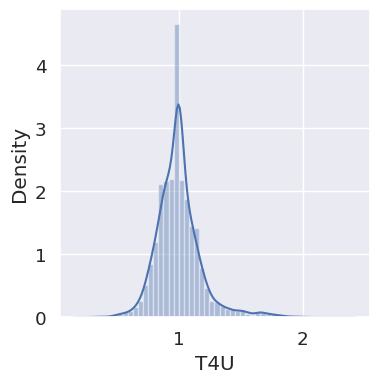

In [40]:
sns.distplot(df['T4U'])

<ipython-input-41-52884c87dd85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FTI'])


<Axes: xlabel='FTI', ylabel='Density'>

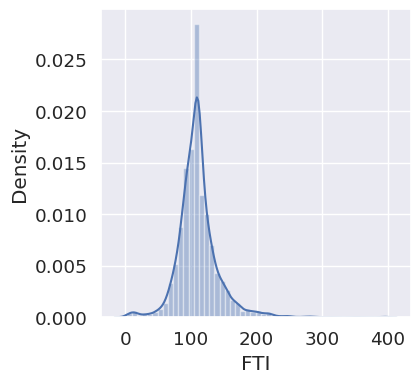

In [41]:
sns.distplot(df['FTI'])

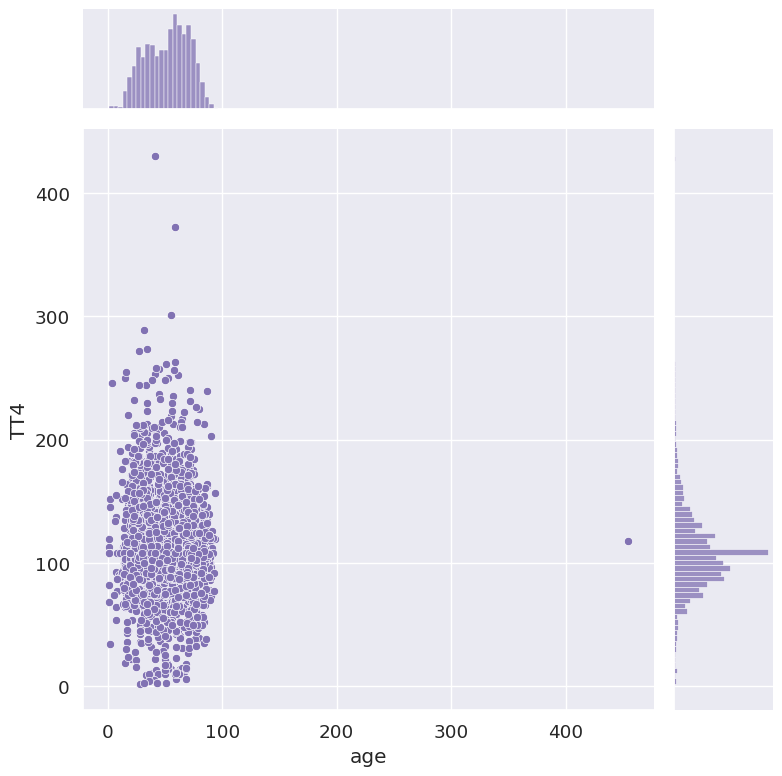

In [ ]:
sns.jointplot(x='age', y='TT4', data=df, kind='scatter', height=8, color='m')

<Axes: xlabel='binaryClass', ylabel='count'>

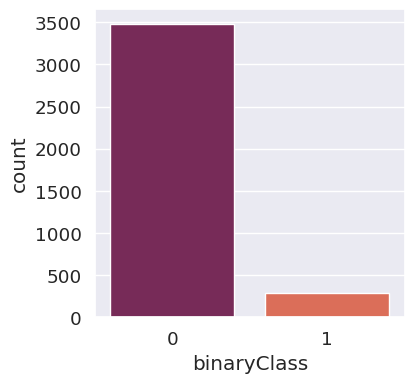

In [46]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

<Axes: xlabel='binaryClass', ylabel='count'>

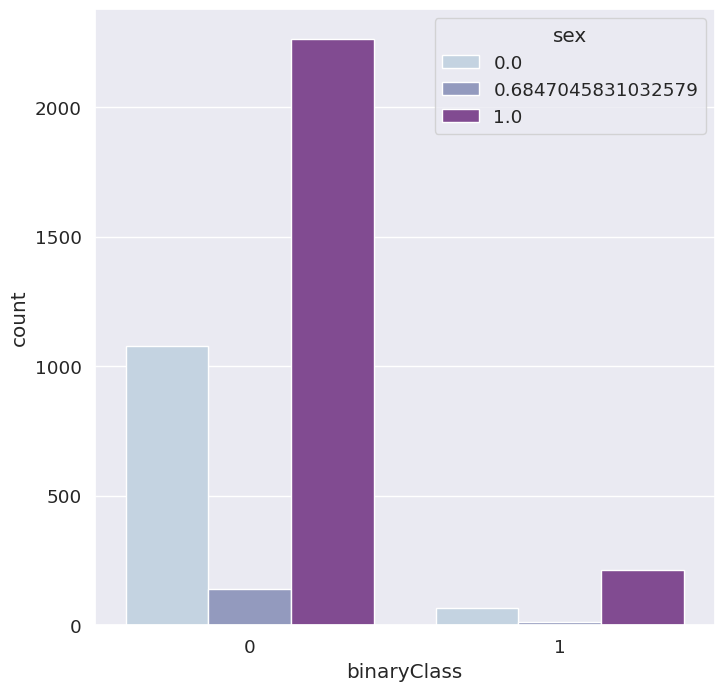

In [ ]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

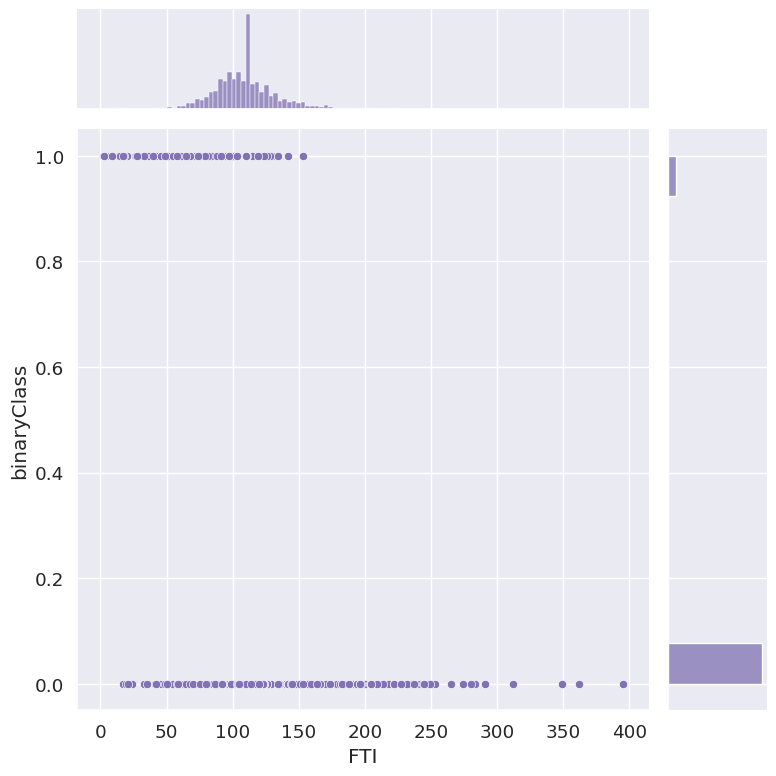

In [ ]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='m')

In [48]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.003606,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,-0.003174
sex,0.003606,1.000000,0.098510,-0.043533,0.030484,-0.005755,0.079550,0.036586,0.020372,0.046353,...,-7.500437e-02,6.275929e-02,-7.387180e-02,1.669887e-01,-4.934307e-02,2.255718e-01,-5.016697e-02,3.853089e-02,NaN,0.050808
on thyroxine,0.014563,0.098510,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,-0.081060
query on thyroxine,-0.017870,-0.043533,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,-0.007448
on antithyroid medication,-0.063881,0.030484,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,-0.021689
sick,0.079468,-0.005755,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,-0.001749
pregnant,-0.113521,0.079550,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,-0.034516
thyroid surgery,-0.029502,0.036586,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,-0.017633
I131 treatment,0.052704,0.020372,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,0.003590
query hypothyroid,0.039562,0.046353,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,0.086282


<Axes: >

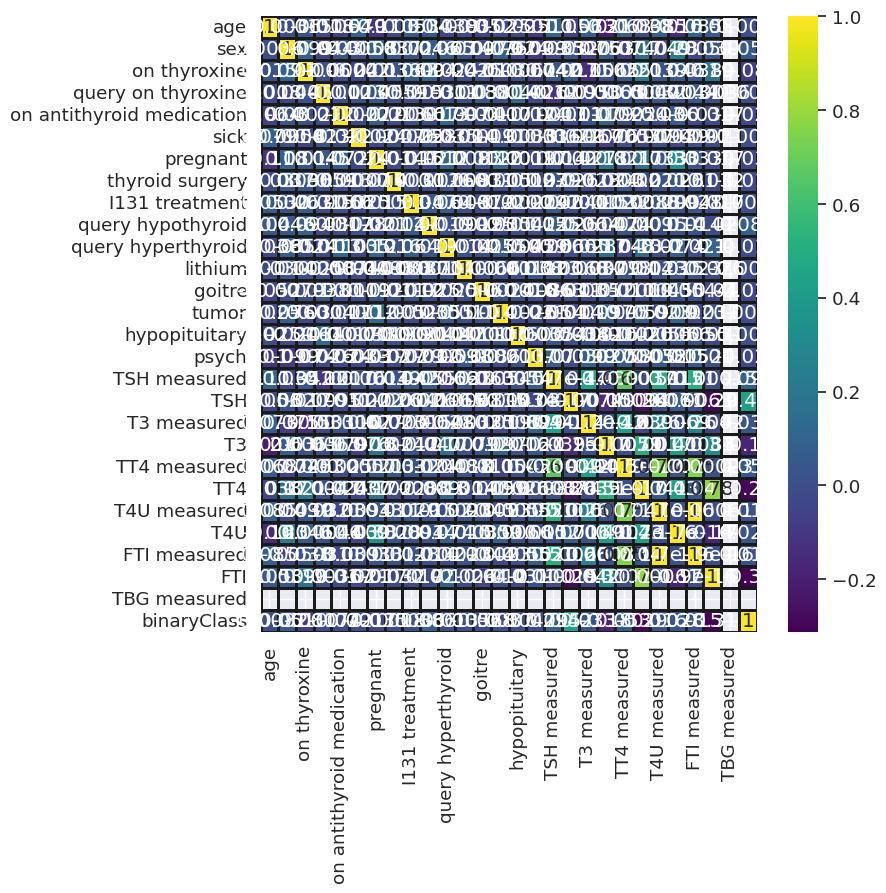

In [ ]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [49]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [50]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

In [53]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.57
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.41e-213
Time:                        16:31:57   Log-Likelihood:                 179.17
No. Observations:                3772   AIC:                            -304.3
Df Residuals:                    3745   BIC:                            -136.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0334      0.058      0.578      0.563      -0.080       0.147
age                       -4.813e-05      0.000     -0.242      0.809      -0.000       0.000
sex                           0.0343      0.009      3.943      0.000       0.017       0.051
on thyroxine                 -0.0530      0.012     -4.339      0.000      -0.077      -0.029
query on thyroxine            0.0377      0.034      1.109      0.268      -0.029       0.104
on antithyroid medication    -0.0469      0.036     -1.299      0.194      -0.118       0.024
sick                         -0.0130      0.020     -0.660      0.509      -0.052       0.026
pregnant                     -0.0573      0.035     -1.654      0.098      -0.125       0.011
thyroid surgery              -0.0964      0.032     -2.989      0.003      -0.160      -0.033
I131 treatment               -0.0086      0.031     -0.279      0.780      -0.069       0.052
query hypothyroid             0.0718      0.016      4.520      0.000       0.041       0.103
query hyperthyroid            0.0258      0.016      1.593      0.111      -0.006       0.057
lithium                      -0.0436      0.055     -0.794      0.427      -0.151       0.064
goitre                       -0.0680      0.040     -1.693      0.091      -0.147       0.011
tumor                         0.0327      0.024      1.344      0.179      -0.015       0.080
hypopituitary                -0.2020      0.234     -0.862      0.389      -0.661       0.257
psych                        -0.0225      0.018     -1.258      0.208      -0.058       0.013
TSH measured                  0.1060      0.018      5.802      0.000       0.070       0.142
TSH                           0.0040      0.000     22.821      0.000       0.004       0.004
T3 measured                  -0.0199      0.011     -1.808      0.071      -0.041       0.002
T3                           -0.0216      0.006     -3.348      0.001      -0.034      -0.009
TT4 measured                  0.0202      0.029      0.704      0.481      -0.036       0.077
TT4                          -0.0016      0.000     -3.641      0.000      -0.002      -0.001
T4U measured                  0.1140      0.165      0.691      0.490      -0.209       0.437
T4U                           0.1602      0.055      2.920      0.004       0.053       0.268
FTI measured                 -0.1421      0.165     -0.863      0.388      -0.465       0.181
FTI                       -5.955e-05      0.000     -0.133      0.894      -0.001       0.001
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2079.207   Durbin-Watson:                   2.009
Prob(Omnibu

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [57]:
x.shape

(3772, 28)

In [62]:
# x_train

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
sc.fit(x_test)
x_test = sc.transform(x_test) # such that mean becomes 0 and standard deviation 1

In [65]:
x_train

array([[ 0.        , -1.25724849,  0.69719436, ...,  0.33666185,
         0.01223448,  0.        ],
       [ 0.        ,  0.01615716,  0.69719436, ...,  0.33666185,
        -1.78005475,  0.        ],
       [ 0.        , -1.01236279,  0.69719436, ...,  0.33666185,
         0.67255156,  0.        ],
       ...,
       [ 0.        ,  0.65285999,  0.69719436, ...,  0.33666185,
         1.89885472,  0.        ],
       [ 0.        ,  1.04467711,  0.69719436, ...,  0.33666185,
         1.01843194,  0.        ],
       [ 0.        ,  1.14263139, -1.49535706, ...,  0.33666185,
         1.89885472,  0.        ]])

<img src="https://lh3.googleusercontent.com/proxy/dmZ-7K8n0tfjlAlmjL316IQymLkEUejTyRJe_PvnpoIvDzoDixx_4L1JmNBYg0xhdyywrCkkjD9F5Snp7PJU8N6RFZ0ke4IO9wMe5c2xbJvC" width="800px">

In [66]:
from tensorflow.keras.models import Sequential # sequentialize the deep learning layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [67]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4)) #drops out 40% of the inputs to prevent overfitting with the next layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) #30%
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2)) #20%

model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20, # no of epochs to be observed before reducing the LR
                         verbose = 1,
                         factor = 0.75, # factor by which learning rate is to be reduced
                         min_lr = 1e-10) # minimum achievable learning rate

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [71]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)


Epoch 1/100
40/40 [==============================] - 3s 17ms/step - loss: 0.3270 - accuracy: 0.9046 - val_loss: 0.2022 - val_accuracy: 0.9223 - lr: 0.0010
Epoch 2/100
18/40 [============>.................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9306

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 0s 8ms/step - loss: 0.1929 - accuracy: 0.9375 - val_loss: 0.1581 - val_accuracy: 0.9364 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.1743 - accuracy: 0.9458 - val_loss: 0.1389 - val_accuracy: 0.9505 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 0.1595 - accuracy: 0.9485 - val_loss: 0.1243 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 0.1460 - accuracy: 0.9544 - val_loss: 0.1113 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 0.1303 - accuracy: 0.9576 - val_loss: 0.0865 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 0.1205 - accuracy: 0.9584 - val_loss: 0.0739 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 8/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0990 - accur

In [73]:
loss,accuracy=model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9894


In [75]:
accuracy*100

98.93955588340759

In [76]:
loss*100

3.9722569286823273

In [82]:
predictions

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# y_test.iloc[1]

In [ ]:
# model.predict(x_test)[70]

30/30 [==============================] - 0s 2ms/step


array([2.1531796e-21], dtype=float32)

In [ ]:
# x_test.shape

(943, 28)

In [ ]:
# model.predict_classes(x_test)[70]

In [83]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

30/30 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [84]:
y_test

270     0
2071    1
3660    0
3207    0
1675    0
       ..
1791    0
2132    0
162     0
1885    0
219     0
Name: binaryClass, Length: 943, dtype: int64

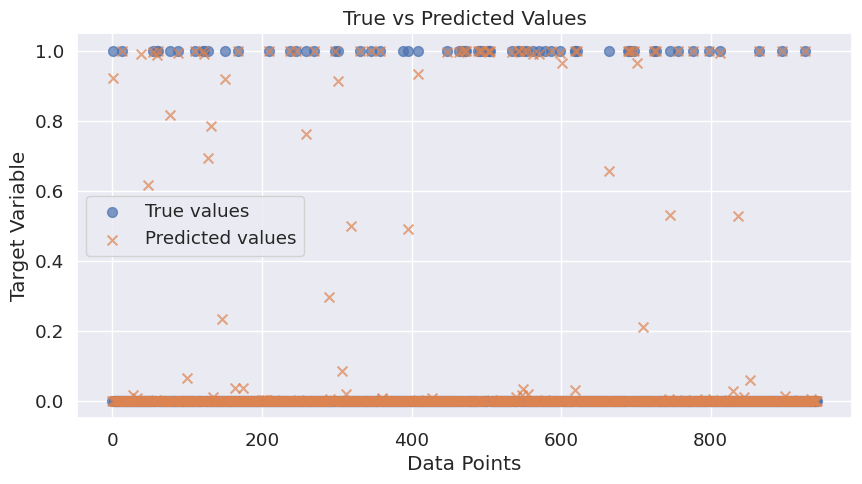

In [88]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True values', alpha=0.7, marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted values', alpha=0.7, marker='x', s=50)
plt.title('True vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

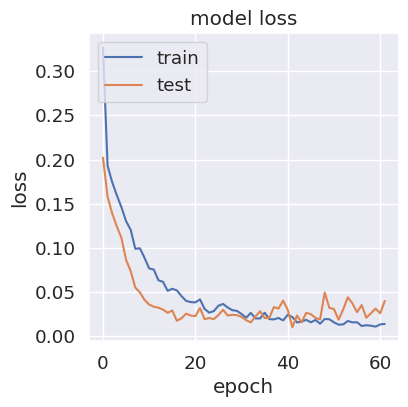

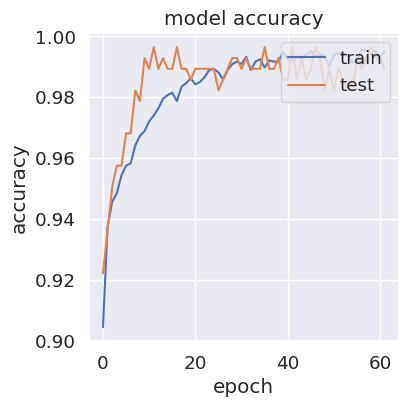

In [89]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [90]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **User specific testing starts here by loading the pretrained model**

In [91]:
import joblib

In [92]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [93]:
sc = joblib.load('scaler.pkl')

In [95]:
%%time
from tensorflow.keras.models import load_model
model = load_model('model.h5')

CPU times: user 200 ms, sys: 1.18 ms, total: 201 ms
Wall time: 215 ms


In [ ]:
x_test.shape

(943, 28)

In [ ]:
interval = 30

# Extract rows at intervals of 30 from x_test
x_demonstrate = x_test[::interval]
y_demonstrate = y_test[::interval] #corresponding outputs for x_demo

# Make predictions for the demonstration subset
predictions = (model.predict(x_demonstrate) > 0.5).astype("int32")

print("Demonstration Predictions and Actual Outputs:")
print('[0] indicated safe patient, and [1] indicated hypothyroid detection')
print("Prediction | Actual Output")

for pred, actual in zip(predictions, y_demonstrate):
    print("  "+f"{pred}      |     {actual}")

1/1 [==============================] - 0s 30ms/step
Demonstration Predictions and Actual Outputs:
[0] indicated safe patient, and [1] indicated hypothyroid detection
Prediction | Actual Output
  [0]      |     0
  [0]      |     0
  [1]      |     1
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [1]      |     1
  [0]      |     0
  [1]      |     1
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
  [0]      |     0
